In [1]:
f = open("poetry.txt")               # 返回一个文件对象   
line = f.readline() 
count = 0              # 调用文件的 readline()方法，一次读取一行
while line:   
    count += 1                 # 后面跟 ',' 将忽略换行符   
    line = f.readline()   
    if count % 1000 == 0:
        print(count, line)
f.close() 

1000 相和歌辞。铜雀妓:昔年分鼎地，今日望陵台。一旦雄图尽，千秋遗令开。绮罗君不见，歌舞妾空来。恩共漳河水，东流无重回。

2000 奉和过慈恩寺应制:凤阙邻金地，龙旂拂宝台。云楣将叶并，风牖送花来。月宫清晚桂，虹梁绚早梅。梵境留宸瞩，掞发丽天才。

3000 歌:汉帝临汾水，周仙去洛滨。郢中吟白雪，梁上绕飞尘。响发行云驻，声随子夜新。愿君听扣角，当自识贤臣。

4000 石门别杨六钦望:燕人同窜越，万里自相哀。影响无期会，江山此地来。暮年伤泛梗，累日慰寒灰。潮水东南落，浮云西北回。俱看石门远，倚棹两悲哉。

5000 别綦毋潜:端笏明光宫，历稔朝云陛。诏刊延阁书，高议平津邸。适意偶轻人，虚心削繁礼。盛得江左风，弥工建安体。高张多绝弦，截河有清济。严冬爽群木，伊洛方清泚。渭水冰下流，潼关雪中启。荷蓧几时还，尘缨待君洗。

6000 送集贤学士伊阙史少府敕放归江东觐省（一作綦毋潜诗）:墨客钟张侣，材高吴越珍。千门来谒帝，驷马去荣亲。吏邑沿清洛，乡山指白蘋。归期应不远，当及未央春。

7000 梁园吟:我浮黄云去京阙，挂席欲进波连山。天长水阔厌远涉，访古始及平台间。平台为客忧思多，对酒遂作梁园歌。却忆蓬池阮公咏，因吟渌水扬洪波。洪波浩荡迷旧国，路远西归安可得。人生达命岂暇愁，且饮美酒登高楼。平头奴子摇大扇，五月不热疑清秋。玉盘杨梅为君设，吴盐如花皎白雪。持盐把酒但饮之，莫学夷齐事高洁。昔人豪贵信陵君，今人耕种信陵坟。荒城虚照碧山月，古木尽入苍梧云。梁王宫阙今安在，枚马先归不相待。舞影歌声散绿池，空馀汴水东流海。沉吟此事泪满衣，黄金买醉未能归。连呼五白行六博，分曹赌酒酣驰辉。歌且谣，意方远。东山高卧时起来，欲济苍生未应晚。

8000 晚登郡阁:怅然高阁望，已掩东城关。春风偏送柳，夜景欲沉山。

9000 赠别王十七管记:故交吾未测，薄宦空年岁。晚节踪曩贤，雄词冠当世。堂中皆食客，门外多酒债。产业曾未言，衣裘与人敝。飘飖戎幕下，出入关山际。转战轻壮心，立谈有边计。云沙自回合，天海空迢递。星空汉将骄，月盛胡兵锐。沙深冷陉断，雪暗辽阳闭。亦谓扫欃枪，旋惊陷蜂虿。归旌告东捷，斗骑传西败。遥飞绝汉书，已筑长安第。画龙俱在叶，宠鹤先居卫。勿辞部曲勋，不藉将军势。相逢季冬月，怅望穷海裔。折剑留赠人，严装遂云迈。我行将悠缅，及此还羁滞。曾非济代谋，且有临深诫。随波混清浊，与物同丑丽

In [79]:
import torch 
import numpy as np
class Tokenizer:
    def __init__(self, token2id_dict):
        self.token2id_dict = token2id_dict
        self.id2token_dict = {}
        for key, value in self.token2id_dict.items():
            self.id2token_dict[value] = key
        self.vocab_size = len(self.token2id_dict)
    
    def id2token(self, id):
        return self.id2token_dict[id]
    
    def token2id(self, token):
        if token in self.token2id_dict.keys():
            return self.token2id_dict[token]
        else:
            return self.token2id_dict['[UNK]']
    
    def encode(self, s):
        id_list = [self.token2id_dict['[CLS]']]
        for token in s:
            id_list.append(self.token2id(token))
        id_list.append(self.token2id_dict['[SEP]'])
        return id_list
    
    def decode(self,id_list):
        special_token = ['[CLS]','[SEP]']
        s = []
        for id in id_list:
            token = self.id2token(id)
            if token in special_token:
                continue
            s.append(token)
        return ''.join(s)

In [80]:
def padding(text,L):
    if len(text) > L:
        res = list(text[:L])
    else:
        res = list(text) + ['[PAD]']*(L-len(text))
    return res
        
def get_id_list(L = 64, filepath = 'poetry.txt'):
    f = open(filepath) 

    data_list = []
    token_count_dict = {}           
    line = f.readline() 

    count = 0
    while line:  
        line = f.readline()
        if '：' in line:
            line = line.replace('：',':')
        if line.count(':') != 1:
            continue
        if line[-1] == '\n':
            line = line[:-1]
            
        main_part = line.split(':')[1]
        data_list.append(main_part)
        token_list = list(main_part)
        for token in token_list:
            if token in token_count_dict.keys():
                token_count_dict[token] += 1
            else:
                token_count_dict[token]  = 1
    f.close() 

    _tokens = [(token, count) for token, count in token_count_dict.items() if count >= 4]
    # 按词频排序
    _tokens = sorted(_tokens, key=lambda x: -x[1])

    token2id_dict = {}
    token2id_dict['[UNK]'] = 0
    token2id_dict['[CLS]'] = 1
    token2id_dict['[SEP]'] = 2
    token2id_dict['[PAD]'] = 3
    for i,_ in enumerate(_tokens):
        token2id_dict[_[0]] = i+4
    
    tokenizer = Tokenizer(token2id_dict)

    id_list = []
    for text in data_list:
        data = padding(text,L)
        id = tokenizer.encode(data)
        id_list.append(id)
    
    id_list = np.array(id_list)
    id_list = torch.from_numpy(id_list)
    return id_list, tokenizer

In [81]:
id_list, tokenizer = get_id_list()

In [82]:
from torch.utils.data import DataLoader, Dataset
def text_data_loader(id_list, batch_size, shuffle=True):
    data_loader = DataLoader(dataset= id_list,batch_size= batch_size,shuffle=shuffle)
    return data_loader

In [6]:
data_loader = text_data_loader(id_list, 64)
for i, batch in enumerate(data_loader):
    print(batch.shape)

torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([64, 66])
torch.Size([6

In [14]:
import torch.nn as nn
embed = nn.Embedding(num_embeddings=tokenizer.vocab_size, embedding_dim = 128)
out = embed(batch.T)

In [39]:
import torch
import torch.nn as nn

class mymodel(nn.Module):
    def __init__(self, num_embeddings, embedding_dim = 128, hidden_dim_1 = 64, hidden_dim_2 = 64):
        super().__init__()
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.lstm_1 = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_dim_1, num_layers = 2, dropout = 0.3)
        self.lstm_2 = nn.LSTM(input_size = hidden_dim_1, hidden_size = hidden_dim_2, num_layers = 1, dropout = 0.2)
        self.mlp = nn.Linear(in_features=hidden_dim_2, out_features= num_embeddings)
        self.softmax = nn.Softmax(dim = -1)

    def forward(self,x):
        x = self.embedding(x)
        x, _ = self.lstm_1(x)
        x, _ = self.lstm_2(x)
        x = self.mlp(x)
        x = self.softmax(x)
        return x


In [49]:
class mymodel(nn.Module):
    def __init__(self, num_embeddings, embedding_dim = 256, hidden_dim_1 = 128):
        super().__init__()
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.lstm_1 = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_dim_1, num_layers = 1)
        self.mlp = nn.Linear(in_features=hidden_dim_1, out_features= num_embeddings)
        self.softmax = nn.Softmax(dim = -1)

    def forward(self,x):
        x = self.embedding(x)
        x, _ = self.lstm_1(x)
        x = self.mlp(x)
        x = self.softmax(x)
        return x

In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [44]:
id_list

tensor([[   1,  196,  366,  ...,    3,    3,    2],
        [   1,   11,   75,  ..., 2067,  116,    2],
        [   1,  660, 1208,  ...,    3,    3,    2],
        ...,
        [   1,  455, 1110,  ...,   18,  220,    2],
        [   1,   44,   73,  ...,    3,    3,    2],
        [   1,  581,  125,  ...,    3,    3,    2]], dtype=torch.int32)

In [52]:
vocab_size = tokenizer.vocab_size
learning_rate = 1e-3
epochs = 20

from torch.optim import Adam
import os

model = mymodel(num_embeddings=vocab_size,  embedding_dim =256, hidden_dim_1= 128)
optimizer = Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

id_list = id_list.to(device)
model = model.to(device)
one_hot_embedding = nn.Embedding(vocab_size, vocab_size, _weight=torch.from_numpy(np.eye(vocab_size))).to(device)

epoch_loss_list = []
for epoch in range(epochs):
    dataloader = text_data_loader(id_list, batch_size=64, shuffle=True)
    epoch_loss = 0
    for i, batch in enumerate(dataloader):
        optimizer.zero_grad()
        x = batch[:,:-1].T
        y = one_hot_embedding(batch[:,1:])

        output = model(x)
        output = output.permute([1,2,0])
        y = y.permute([0,2,1])

        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        if i %50 == 0:
            print(f'epoch {epoch} batch {i} epoch_loss {round(epoch_loss,4)}')
    epoch_loss_list.append(epoch_loss)
   


epoch 0 batch 0 epoch_loss 8.6497
epoch 0 batch 50 epoch_loss 435.4095
epoch 0 batch 100 epoch_loss 857.3989
epoch 0 batch 150 epoch_loss 1279.2574
epoch 0 batch 200 epoch_loss 1701.0292
epoch 0 batch 250 epoch_loss 2120.586
epoch 0 batch 300 epoch_loss 2539.5625
epoch 0 batch 350 epoch_loss 2958.6485
epoch 0 batch 400 epoch_loss 3377.8302
epoch 0 batch 450 epoch_loss 3796.4996
epoch 0 batch 500 epoch_loss 4215.7499
epoch 0 batch 550 epoch_loss 4634.32
epoch 0 batch 600 epoch_loss 5053.2158
epoch 0 batch 650 epoch_loss 5472.042
epoch 1 batch 0 epoch_loss 8.3546
epoch 1 batch 50 epoch_loss 427.6257
epoch 1 batch 100 epoch_loss 846.606
epoch 1 batch 150 epoch_loss 1265.6815
epoch 1 batch 200 epoch_loss 1684.4838
epoch 1 batch 250 epoch_loss 2103.4196
epoch 1 batch 300 epoch_loss 2521.8487
epoch 1 batch 350 epoch_loss 2940.9628
epoch 1 batch 400 epoch_loss 3359.9582
epoch 1 batch 450 epoch_loss 3778.9471
epoch 1 batch 500 epoch_loss 4197.6743
epoch 1 batch 550 epoch_loss 4616.5973
epoch 1

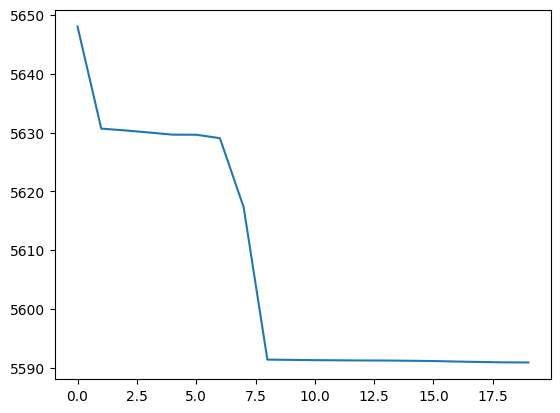

In [53]:
import matplotlib.pyplot as plt 
plt.plot(epoch_loss_list)
plt.show()

In [54]:
def generate_random_poetry(tokenizer, model, s=''):
    """
    随机生成一首诗
    :param tokenizer: 分词器
    :param model: 用于生成古诗的模型
    :param s: 用于生成古诗的起始字符串，默认为空串
    :return: 一个字符串，表示一首古诗
    """
    # 将初始字符串转成token
    token_ids = tokenizer.encode(s)
    # 去掉结束标记[SEP]
    token_ids = token_ids[:-1]
    while len(token_ids) < 66:
        # 进行预测，只保留第一个样例（我们输入的样例数只有1）的、最后一个token的预测的、不包含[PAD][UNK][CLS]的概率分布
        output = model(np.array([token_ids, ], dtype=np.int32))
        _probas = output.numpy()[0, -1, 3:]
        del output
        # print(_probas)
        # 按照出现概率，对所有token倒序排列
        p_args = _probas.argsort()[::-1][:100]
        # 排列后的概率顺序
        p = _probas[p_args]
        # 先对概率归一
        p = p / sum(p)
        # 再按照预测出的概率，随机选择一个词作为预测结果
        target_index = np.random.choice(len(p), p=p)
        target = p_args[target_index] + 3
        # 保存
        token_ids.append(target)
        if target == 3:
            break
    return tokenizer.decode(token_ids)

In [55]:
s = ''
token_ids = tokenizer.encode(s)
token_ids = token_ids[:-1]
token_ids

[1]

In [59]:
model.to('cpu')

mymodel(
  (embedding): Embedding(5708, 256)
  (lstm_1): LSTM(256, 128)
  (mlp): Linear(in_features=128, out_features=5708, bias=True)
  (softmax): Softmax(dim=-1)
)

In [85]:
token_ids = [88,90]
while len(token_ids) < 66:
    # 进行预测，只保留第一个样例（我们输入的样例数只有1）的、最后一个token的预测的、不包含[PAD][UNK][CLS]的概率分布
    output = model(torch.from_numpy(np.array([token_ids, ], dtype=np.int32)))
    _probas =  output.detach().numpy()[0, -1, 3:]
    del output
    # print(_probas)
    # 按照出现概率，对所有token倒序排列
    p_args = _probas.argsort()[::-1][:100]
    # 排列后的概率顺序
    p = _probas[p_args]
    # 先对概率归一
    p = p / sum(p)
    # 再按照预测出的概率，随机选择一个词作为预测结果
    target_index = np.random.choice(len(p), p=p)
    target = p_args[target_index] + 3
    # 保存
    token_ids.append(target)
    if target == 3:
        break